In [1]:
import pandas as pd
import os

In [2]:
os.chdir('..')

In [3]:
BetaKit_df = pd.read_csv("E:\Zemoso Personal\ParseHub Datasets\Canada_Articles.csv")

In [4]:
BetaKit_df.head

<bound method NDFrame.head of                                             Unnamed: 0  \
0    Mark McQueen thinks it’s a great time to have ...   
1    Tech-enabled fulfillment company Darwynn close...   
2    Introhive cuts 16 percent of workforce citing ...   
3    Blume secures $2 million CAD to scale latte re...   
4    Why now is the time for Canadian startups to h...   
..                                                 ...   
184  S|W: The SaaS Weekly – Bessemer says centaurs ...   
185  MLSE, TMU reveal eight sport tech startups to ...   
186  FinTech startup Swoop raises £5.4 million to t...   
187  University of Waterloo quantum expert-led Evol...   
188  F|T: The FinTech Times – Clearco continues EU ...   

                               selection1_article_text  
0    We’ve had quite a few VCs as guests on the pod...  
1    Scarborough-headquartered Darwynn has secured ...  
2    Fredericton-based Introhive has made cuts to i...  
3    Vancouver-based organic food brand Blume

In [5]:
import re

In [6]:
BetaKit_df['article_text_processed'] = \
BetaKit_df['selection1_article_text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

In [7]:
# Convert the titles to lowercase
BetaKit_df['article_text_processed'] = \
BetaKit_df['selection1_article_text'].map(lambda x: str(x).lower())

In [8]:
BetaKit_df['article_text_processed'].head()

0    we’ve had quite a few vcs as guests on the pod...
1    scarborough-headquartered darwynn has secured ...
2    fredericton-based introhive has made cuts to i...
3    vancouver-based organic food brand blume has c...
4    while canadians are highly educated and some o...
Name: article_text_processed, dtype: object

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

In [11]:
long_string = ','.join(list(BetaKit_df['article_text_processed'].values))

In [12]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [13]:
wordcloud.generate(long_string)

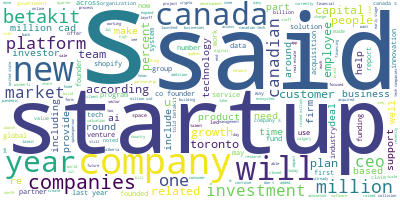

In [14]:
wordcloud.to_image()

In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','canada','startup','company','said', 'will','company'])

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [18]:
data = BetaKit_df.article_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [19]:
data_words = remove_stopwords(data_words)

In [20]:
print(data_words[:1][0][:30])

['quite', 'vcs', 'guests', 'podcast', 'recently', 'reason', 'like', 'hearing', 'say', 'look', 'companies', 'today', 'reminded', 'like', 'bleak', 'summer', 'play', 'investor', 'entrepreneur', 'sometimes', 'create', 'perception', 'vcs', 'telling', 'exactly', 'going', 'frankly', 'simply', 'perspectives', 'inform']


In [21]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [22]:
from pprint import pprint

num_topics = 1

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"million" + 0.006*"tech" + 0.005*"betakit" + 0.005*"companies" + '
  '0.005*"year" + 0.004*"also" + 0.004*"canadian" + 0.004*"new" + '
  '0.004*"market" + 0.004*"based"')]


In [28]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(r"E:\Zemoso Personal\ParseHub Datasets"+str(num_topics))

In [31]:

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

C:\Python\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


AssertionError: 

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [25]:
pyLDAvis.save_html(LDAvis_prepared, r'E:\Zemoso Personal\NLP_Results'+str(num_topics) +'.html')

NameError: name 'LDAvis_prepared' is not defined

In [ ]:
LDAvis_prepared